# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [145]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [146]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    # %memit func(size)
    print('\n')

SIZE:  100
Timing: 
194 µs ± 25.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 


SIZE:  1000
Timing: 
23.6 ms ± 1.06 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 


SIZE:  10000
Timing: 
2.22 s ± 33.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 




***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


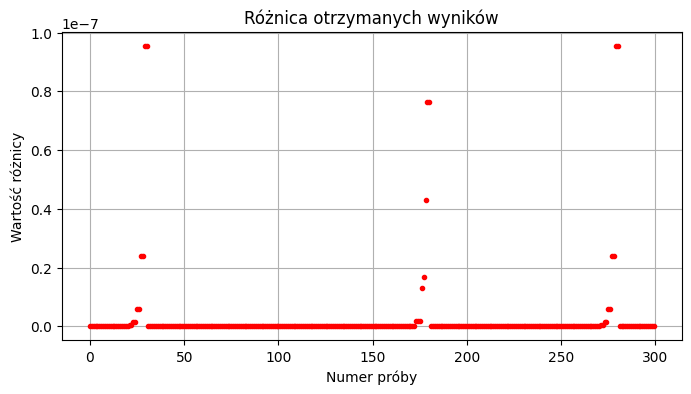

In [147]:
import main
import numpy as np
n = np.arange(1, 51, 1)
c = np.array([0.1, 0.125, 0.25, 0.33, 0.5, 0.6])

result = np.zeros((6, 50))
for idx1, el1 in enumerate(c):
    for idx2, el2 in enumerate(n):
        result[idx1][idx2] = main.p_diff(el2, el1)

_, ax = plt.subplots(figsize= (8, 4))
ax.set(title= 'Różnica otrzymanych wyników', xlabel= 'Numer próby', ylabel= 'Wartość różnicy')
for idx1, row in enumerate(result):
    for idx2, el in enumerate(row):      
        ax.plot(idx2 + idx1 * 50, el, 'r.')

plt.grid()
plt.show()       


1. Jako wynik powinniśmy otrzymać same zera, jednakże dla niektórych danych różnice mają niewielkie wartości.
2. Skończoną reprezentację mają wszystkie liczby, które możemy przedstawić jako krotności potęg dwójki. DLa rozważanych danych, nie jest to osiągalne dla wartości: 0.1, 0.33 oraz 0.6.
3. Wyniki różnią się od siebie ze względu na to, że liczba bitów przeznaczona na zapis liczby jest skończona.
4. W tym zadaniu mamy do czynienia z błędem zaokrągleń.
5. Poprawność działania wyrażeń można poprawić poprzez zwiększenie liczby bitów odpowiadających mantysie.

***Wnioski:***
Dzięki temu zadaniu mogłam przekonać się w praktyce o tym, jak działają błędy zaokrągleń. Dotyczą one zdecydowanej większości działań wykonywanych za pomocą komputera.

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

Wartość liczby e = 1.0 dla n = 1
Wartość liczby e = 2.0 dla n = 2
Wartość liczby e = 2.5 dla n = 3
Wartość liczby e = 2.6666666666666665 dla n = 4
Wartość liczby e = 2.708333333333333 dla n = 5
Wartość liczby e = 2.7166666666666663 dla n = 6
Wartość liczby e = 2.7180555555555554 dla n = 7
Wartość liczby e = 2.7182539682539684 dla n = 8
Wartość liczby e = 2.71827876984127 dla n = 9
Wartość liczby e = 2.7182815255731922 dla n = 10


Text(0.5, 0.98, 'Porównanie błędów przy obliczaniu eksponenty na podstawie przybliżenia szeregiem Taylora')

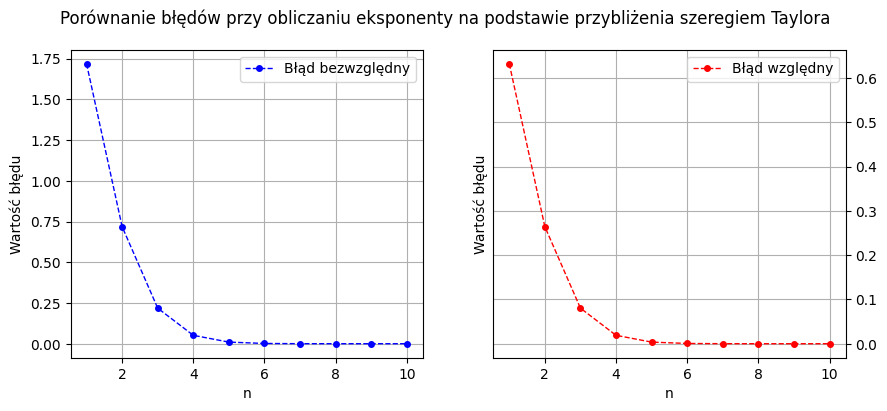

In [151]:
import main
import numpy as np
x = 1
n = [el for el in range(1, 11)]
abs_err = [0 for el in n]
rel_err = [0 for el in n]
for el in n:
    e = main.exponential(x, el)
    print("Wartość liczby e = {0} dla n = {1}".format(e, el))
    abs_err[el - 1] = main.absolut_error(e, np.exp(x))
    rel_err[el - 1] = main.relative_error(np.exp(x), e)
    
plt.figure(figsize= (10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(n, abs_err, 'b.--', linewidth= 1, markersize= 8,  label= 'Błąd bezwzględny')
ax1.set(xlabel = 'n', ylabel= 'Wartość błędu')
ax1.grid()
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(n, rel_err, 'r.--',linewidth= 1, markersize= 8,label= 'Błąd względny')
ax2.set(xlabel = 'n', ylabel= 'Wartość błędu' )
ax2.yaxis.set_ticks_position('right')
ax2.grid()
plt.legend()

plt.suptitle('Porównanie błędów przy obliczaniu eksponenty na podstawie przybliżenia szeregiem Taylora')

1. Omawiany przykład obrazuje błąd metody. Do obliczenia wartości eksponenty korzystamy z przybliżenia przy pomocy szeregu Taylora.
2. Zarówno błędy względne, jak i bezwzględne silnie maleją wraz ze wzrostem wartości *n*. Jest to naturalnym potwierdzeniem tego, że zwiększenie dokładności redukuje błędy. 

***Wnioski:***
Dzięki realizacji tego zadania, przekonałam się na praktycznym przykładzie o tym, jak zwiększanie dokładności przybliżeń matematycznych wpływa na błędy względne oraz bezwzględne.

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

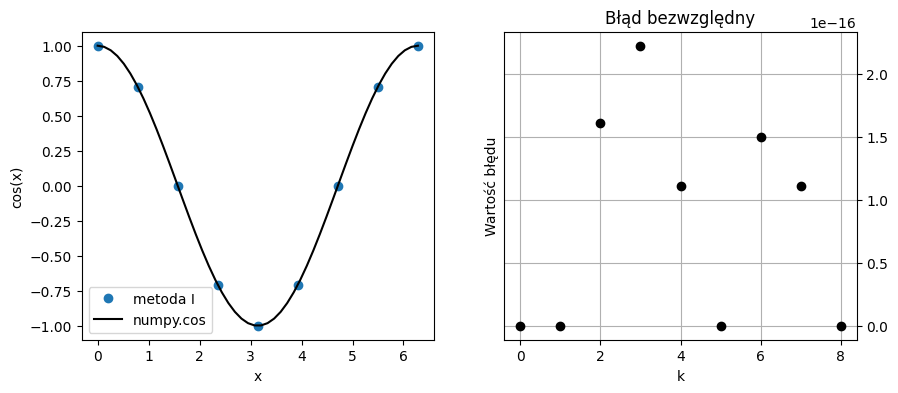

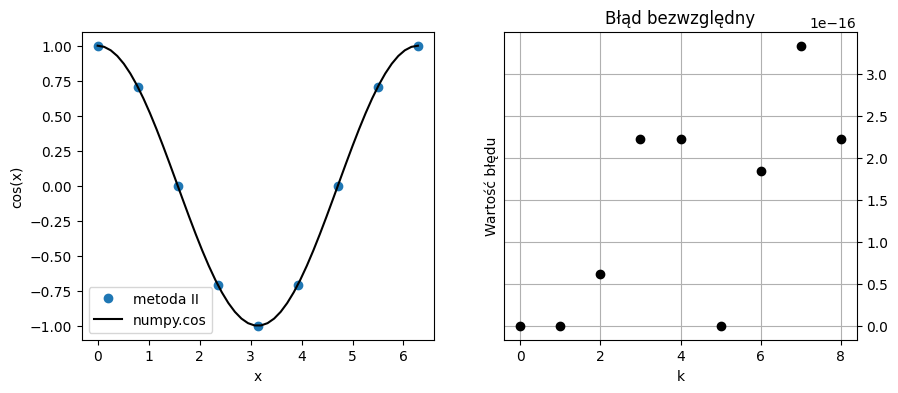

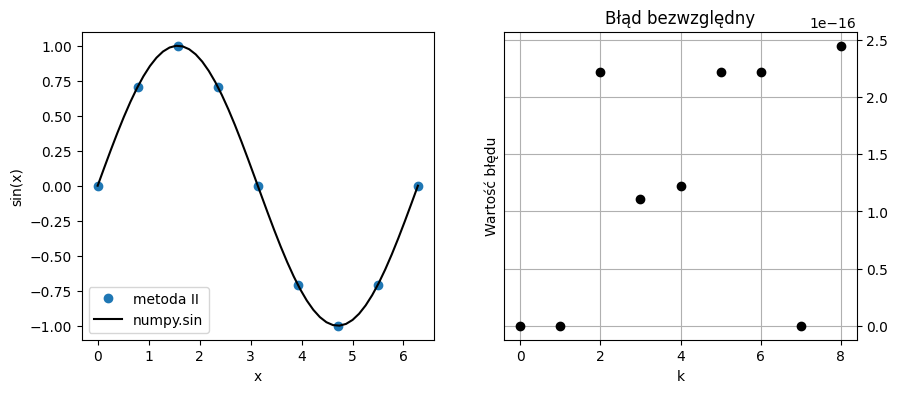

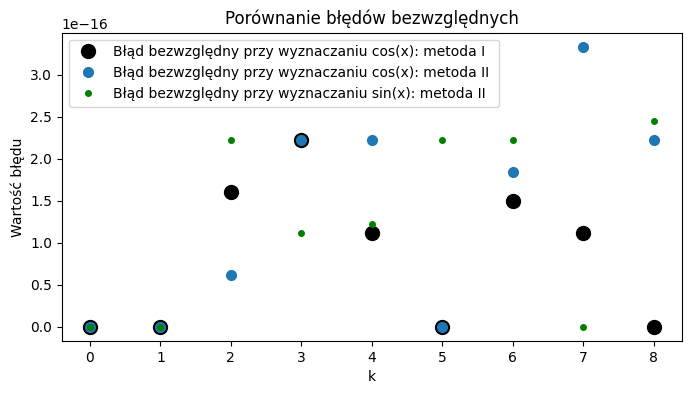

In [152]:
import numpy as np
import main
def lista():
    return [0 for el in range(9)]

k = [el for el in range(9)]
x = np.pi/4
x1 = np.linspace(0, np.pi * 2)
x2 = [el * x for el in range(9)]
cosx1 = lista()
cosx2 = lista()
sinx2 = lista()
abs_err1 = lista()
abs_err2 = lista()
abs_err3 = lista()
for el in k:
    cosx1[el] = main.coskx1(el, x)
    abs_err1[el] = main.absolut_error(np.cos(x* el), main.coskx1(el, x))
    cosx2[el] = main.coskx2(el, x)[0]
    abs_err2[el] =  main.absolut_error(main.coskx2(el, x)[0], np.cos(x * el))
    sinx2[el] = main.coskx2(el, x)[1]
    abs_err3[el] = main.absolut_error(main.coskx2(el, x)[1], np.sin(x * el))

plt.figure(figsize= (10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x2, cosx1, 'o',label= "metoda I" )
ax1.plot(x1, np.cos(x1), 'k', label= "numpy.cos")
ax1.set(xlabel= 'x', ylabel= 'cos(x)')
plt.legend(loc= 'lower left')
ax4 = plt.subplot(1, 2, 2)
ax4.plot(abs_err1, 'ko')
ax4.set(xlabel= 'k', ylabel= 'Wartość błędu', title= "Błąd bezwzględny")
plt.grid()
ax4.yaxis.set_ticks_position('right')


plt.figure(figsize= (10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x2, cosx2, 'o',label= "metoda II" )
ax1.plot(x1, np.cos(x1), 'k', label= "numpy.cos")
ax1.set(xlabel= 'x', ylabel= 'cos(x)')
plt.legend(loc= 'lower left')
ax4 = plt.subplot(1, 2, 2)
ax4.plot(abs_err2, 'ko')
ax4.set(xlabel= 'k', ylabel= 'Wartość błędu', title= "Błąd bezwzględny")
plt.grid()
ax4.yaxis.set_ticks_position('right')


plt.figure(figsize= (10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x2, sinx2, 'o',label= "metoda II" )
ax1.plot(x1, np.sin(x1), 'k', label= "numpy.sin")
ax1.set(xlabel= 'x', ylabel= 'sin(x)')
plt.legend(loc= 'lower left')
ax4 = plt.subplot(1, 2, 2)
ax4.plot(abs_err3, 'ko')
ax4.set(xlabel= 'k', ylabel= 'Wartość błędu', title= "Błąd bezwzględny")
plt.grid()
ax4.yaxis.set_ticks_position('right')



fig, ax2 = plt.subplots(figsize= (8, 4))
ax2.plot(abs_err1, 'ko', markersize = 10, label= 'Błąd bezwzględny przy wyznaczaniu cos(x): metoda I ')
ax2.plot(abs_err2, 'o', markersize = 7,  label= 'Błąd bezwzględny przy wyznaczaniu cos(x): metoda II ' )
ax2.plot(abs_err3, 'go',markersize = 4,  label= 'Błąd bezwzględny przy wyznaczaniu sin(x): metoda II ')
ax2.set(xlabel= 'k', ylabel= 'Wartość błędu', title= "Porównanie błędów bezwzględnych")
plt.legend()


***Wnioski:***
To zadanie pozwoliło na lepsze zrozumienie błędów metody. Obie metody zastosowane w ćwiczeniu dały bardzo dobre przybliżenie oczekiwanych wyników. Jednakże, dzięki odpowiednim wykresom mogłam zauważyć, że wartość błędu jest uzależniona od wyboru metody, jaką wyznaczamy interesujące nas wartości. Mimo że szukaliśmy tych samych wyników, poziomy błędów różnią się w zależności od wyboru rekurencyjnego przybliżenia. 

***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

808 ns ± 216 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.29 µs ± 323 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.43 µs ± 220 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.83 µs ± 348 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.1 µs ± 166 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.47 µs ± 153 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.83 µs ± 132 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.19 µs ± 150 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.56 µs ± 124 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
4.27 µs ± 452 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


[]

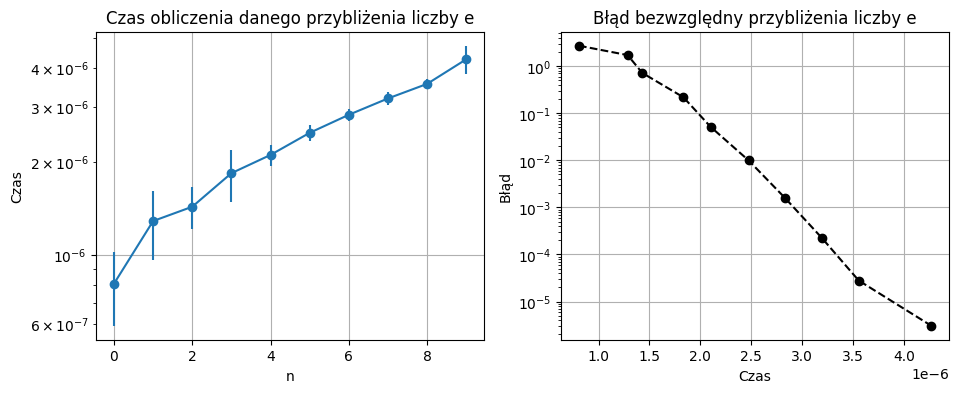

In [150]:
import main
import numpy as np
x = np.arange(0, 10)
timing = np.zeros(10)
abs_err = np.zeros(10)
stdev = np.zeros(10)


for n in range(10):
    saved_timing = %timeit -r 5 -n 10 -o main.exponential(1, n)
    timing[n] = saved_timing.average
    stdev[n] = saved_timing.stdev
    abs_err[n] = main.absolut_error( main.exponential(1, n), np.exp(1))
    # memo[n] = %memit main.exponential(1, n)


plt.figure(figsize= (11, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.errorbar(x, timing,  yerr=stdev, marker= 'o')
ax1.set(xlabel= 'n', ylabel= 'Czas', title= 'Czas obliczenia danego przybliżenia liczby e')
ax1.grid()
ax1.semilogy()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(timing, abs_err, 'ko--')
ax2.set(xlabel= 'Czas', ylabel= 'Błąd', title= 'Błąd bezwzględny przybliżenia liczby e')
ax2.grid()
ax2.semilogy()  



***Wnioski:***
W tym zadaniu miałam okazję zapoznać się z tematem profilowania kodu przy pomocy funkcji *memit* oraz *timeit*. Dowiedziałam się, że otrzymywane wyniki mogą się znacznie różnić przy każdej próbie sprawdzenia wydajności funkcji. Dodatkowo, zauważyłam, że czas potrzebny na obliczenie danych wartości zwiększa się wraz ze zwiększeniem oczekiwanej dokładności. Błąd bezwzględny maleje wraz ze zwiększeniem omawianego czasu.